# Roivant Clinical Trials Monte Carlo NPV
---
#### Goal: To evaluate the NPV of various drugs at various stages

##### Input:
- Drug Id (some identifier for a drug)
- Number of simulations
- List of Stages (Phase 2, Phase 3, NDA, Complete) as an example
- Start Year the year into a patent that Roivant obtains a drug
- yearly cost: the forcasted average cost per year
- yearly rev: the forcased average revenue to expect for each year
- cost_dist: the distribution function and function parameters that describe randomness in changes in the yearly cost 
- rev_dist: same as cost_dist but for revenue
- probs: a list of transition probabilities for each stage. For instance, if the durg has only NDA stage left stage_list = ('NDA', 'DONE') then the probability list would simply be [0.85] for instance because there is just one transition NDA -> (COMPLETE or FAIL)
---

##### Design:
My initial idea for behind the mc_trials package was to create a simple state machine. The possible pathways for a clinical trial can be thought of as a directed acyclic graph (DAG). For each state, there are two outcomes: Successfully move to the next trial or fail (ignoring the case that a trial could skip to a later stage). For instance, Pretrials can either move to Phase I or fail to move forward. While normal clinical trials follow a traditional path of Pre -> Phase I -> Phase II -> Phase III -> NDA -> DONE, I added a parameter called stage_list so that a user could override the pathway. This comes in handy if a drug has potential for skipping a stage and if the drug has already reached a later stage.

##### For the NPV calculations:
Assumption: Patents last 11 years - should parametrize in the future
User must include: 
- start_year: number of years into the patent
- yearly_costs: costs from the beginning of the patent life to the end
- yearly_rev: rev from beginning of patent to end
- cost_dist
- rev_dist
- initial_cost

start_year must be less than 11 or patent life
yearly_costs and revenue should be a list of length 11


##### Output:
Returns a list of tuples containing the following 
```
(<ENUM> DONE | FAILED, <State> State Object, <Float> NPV)
```

With this list, you can analyze the distribution of terminal states for a drug, how many outcomes resulted in a complete vs failed, and the NPV for these cuts

In [22]:
%matplotlib inline
from mc_trials import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [23]:
sim = Simulation(
    1234, # some drug id
    10000, # num simulations
    stage_list=('P2','P3','NDA','DONE'),
    stage_len=[2,2,1,4],
    initial_cost=50,
    start_year=2,
    yearly_cost=[1., 1., 4., 4., 4., 1., 1., 2., 2., 1., 1.],
    yearly_rev = [0., 0., 0., 0., 0., 10., 50., 80., 70., 70., 50.],
    cost_dist = (np.random.normal, (0, 1)),
    rev_dist = (np.random.normal, (0, 10)),
    probs=[1, 1, 1] 
    # Notice: this is an impossible 
    # case of passing every stage 100% of the time
)

In [24]:
results = sim.run_simulation()

In [25]:
# the results list is a list of tuples 
# with (status, final state object, NPV)
print 'STATUS:', results[0][0], 'NPV:', results[0][2]

STATUS: DONE NPV: 93.3102333556


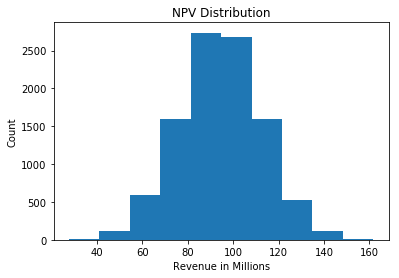

In [28]:
plt.hist([result[2] for result in results])
plt.title('NPV Distribution')
plt.xlabel('Revenue in Millions')
plt.ylabel('Count')
plt.show()